In [5]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [6]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Implementing Random Forest, KNN and Logistic Regresion, then Stacking

Stacking Classifier Metrics:
Accuracy: 0.7710521101644542
Recall: 0.8188475621507034
F1 Score: 0.7861966879452308


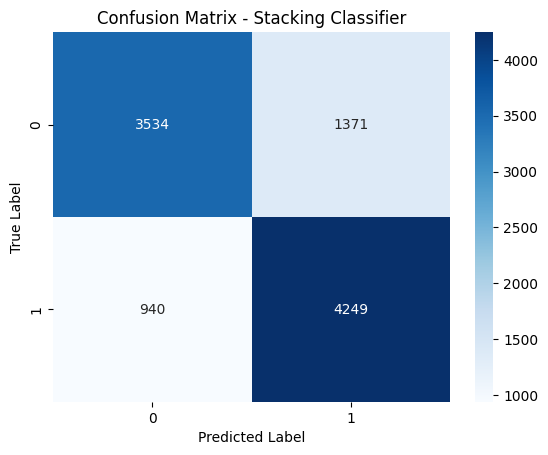

In [8]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest model
modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the KNN model 
modelKNN = KNeighborsClassifier(n_neighbors=12)

# Initialize the Logistic Regression model
modelLogistic = LogisticRegression(max_iter=500, random_state=42)

# Create a StackingClassifier with Naive Bayes as the final estimator
stacking_model = StackingClassifier(estimators=[
    ('random_forest', modelRandomForest),
    ('knn', modelKNN),
    ('logistic', modelLogistic)
], final_estimator=GaussianNB())

# Fit the StackingClassifier on the training data
stacking_model.fit(x_train, y_train)

# Make predictions for the test data
y_pred_stacking = stacking_model.predict(x_test)

# Calculate evaluation metrics for stacking
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# Print the metrics for stacking
print("Stacking Classifier Metrics:")
print("Accuracy:", accuracy_stacking)
print("Recall:", recall_stacking)
print("F1 Score:", f1_stacking)

# Plot the confusion matrix for stacking
sns.heatmap(conf_matrix_stacking, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()